In [15]:
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [10]:
def formal_solution(tau, S, mu):
    
    ND = len(tau)
    I = np.zeros(ND)
    
    step = -1
    start = ND-1
    end = 0
    I[start] = S[start]
    
    
    if (mu < 0):
        step = 1
        start = 0 
        end = ND -1
        I[0] = 0.0
        
    for i in range(start+step, end+step, step):
        
        
        
        S_mean = (S[i] + S[i-step]) * 0.5
        
        delta = (tau[i-step] - tau[i]) / mu 
        
        #print (i, delta)
        
        I[i] = I[i-step] * np.exp(-delta) + S_mean * (1.0 - np.exp(-delta))
        
        
    return I
        
        
        
        
    

In [11]:
logtau = np.linspace(-3,3,61)
tau = 10.0 ** logtau
S = np.ones(61)

I_out = formal_solution(tau, S, 1)
I_in = formal_solution(tau, S, -1)

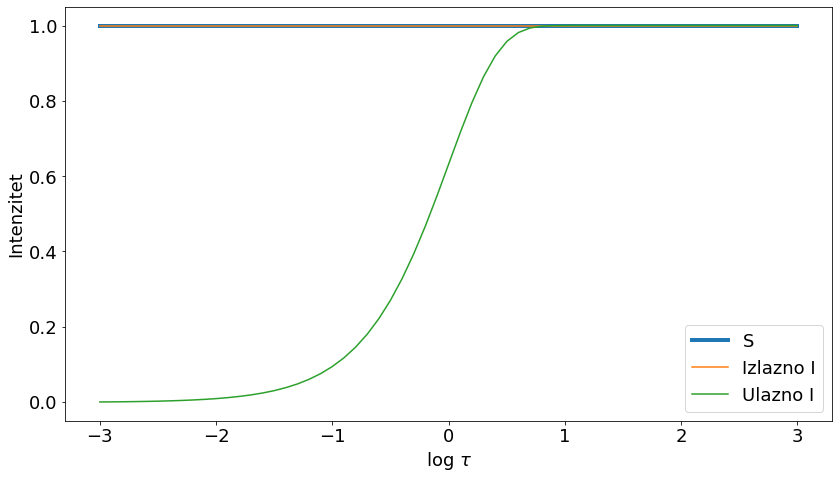

In [20]:
plt.figure(figsize=[12,7])
plt.plot(logtau, S, label='S',linewidth = 4)
plt.plot(logtau, I_out, label = 'Izlazno I')
plt.plot(logtau, I_in, label = 'Ulazno I')
plt.xlabel("log $\\tau$")
plt.ylabel("Intenzitet")
plt.legend()
plt.tight_layout()
plt.savefig("FS_in_out.jpg",bbox_inches='tight')

In [22]:
mu = np.array([-np.sqrt(0.6), 0 , np.sqrt(0.6)])
wmu = np.array([0.55555, 0.88888, 0.55555])

mu = mu / 2.0 
mu = mu+0.5
print (mu)

wmu = wmu / np.sum(wmu)

[0.11270167 0.5        0.88729833]


In [23]:
J = np.zeros(len(S))
for m in range(0,3):
    I_in = formal_solution(tau,S, -mu[m])
    I_out = formal_solution(tau,S, mu[m])
    
    J+= 0.5 * (I_in + I_out) * wmu[m]

In [24]:
print (J)

[0.5        0.50047429 0.50107025 0.50181872 0.50275813 0.50393629
 0.50541241 0.50725958 0.50956751 0.51244554 0.5160258  0.52046615
 0.52595241 0.5326991  0.54094741 0.55095901 0.56300349 0.57733771
 0.59417572 0.61365023 0.63577042 0.66038706 0.68718155 0.71569685
 0.74541673 0.77586983 0.80669615 0.8375982  0.86815563 0.89760716
 0.92479512 0.94839518 0.96734165 0.98120844 0.99033715 0.99566229
 0.99835714 0.99950028 0.99988579 0.99998197 0.99999823 0.9999999
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


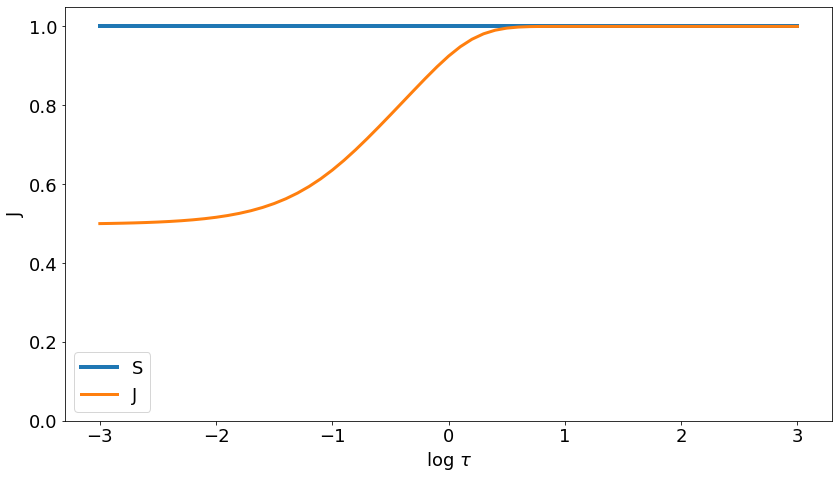

In [27]:
plt.figure(figsize=[12,7])
plt.plot(logtau, S, label='S',linewidth = 4)
plt.plot(logtau, J, label='J', linewidth = 3)
plt.ylim([0.0,1.05])
plt.xlabel("log $\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_isothermal.jpg",bbox_inches='tight')

In [33]:
S = 0.7 + 0.1 * logtau
J = np.zeros(len(S))
for m in range(0,3):
    I_in = formal_solution(tau,S, -mu[m])
    I_out = formal_solution(tau,S, mu[m])
    
    J+= 0.5 * (I_in + I_out) * wmu[m]

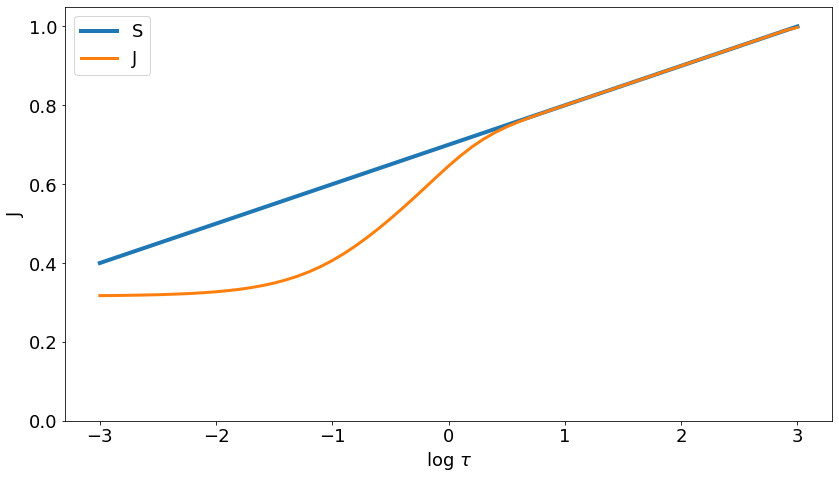

In [34]:
plt.figure(figsize=[12,7])
plt.plot(logtau, S, label='S',linewidth = 4)
plt.plot(logtau, J, label='J', linewidth = 3)
plt.ylim([0.0,1.05])
plt.xlabel("log $\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_constant.jpg",bbox_inches='tight')

In [30]:
S = 0.7 + 0.1 * logtau + 0.05 * logtau**2.0
J = np.zeros(len(S))
for m in range(0,3):
    I_in = formal_solution(tau,S, -mu[m])
    I_out = formal_solution(tau,S, mu[m])
    
    J+= 0.5 * (I_in + I_out) * wmu[m]

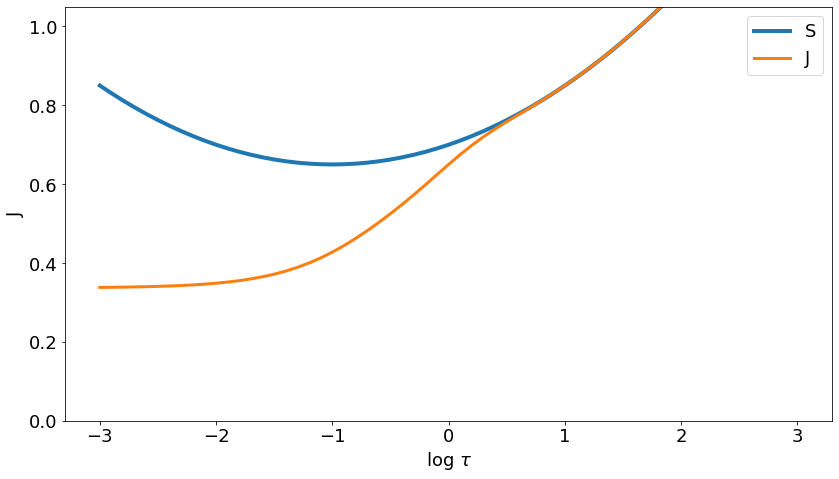

In [32]:
plt.figure(figsize=[12,7])
plt.plot(logtau, S, label='S',linewidth = 4)
plt.plot(logtau, J, label='J', linewidth = 3)
plt.ylim([0.0,1.05])
plt.xlabel("log $\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_quadratic.jpg",bbox_inches='tight')

In [36]:
tau = np.linspace(0,3,301)
S = 0.5 + tau
J = np.zeros(len(S))
for m in range(0,3):
    I_in = formal_solution(tau,S, -mu[m])
    I_out = formal_solution(tau,S, mu[m])
    
    J+= 0.5 * (I_in + I_out) * wmu[m]

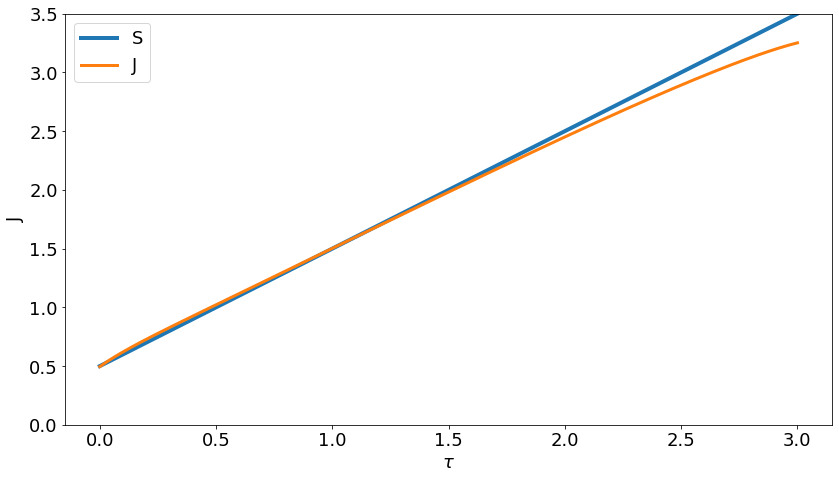

In [39]:
plt.figure(figsize=[12,7])
plt.plot(tau, S, label='S',linewidth = 4)
plt.plot(tau, J, label='J', linewidth = 3)
plt.ylim([0.0,3.5])
plt.xlabel("$\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_quadratic.jpg",bbox_inches='tight')

In [40]:
tau = np.linspace(0,3,301)
S = 0.666667 + tau
J = np.zeros(len(S))
for m in range(0,3):
    I_in = formal_solution(tau,S, -mu[m])
    I_out = formal_solution(tau,S, mu[m])
    
    J+= 0.5 * (I_in + I_out) * wmu[m]

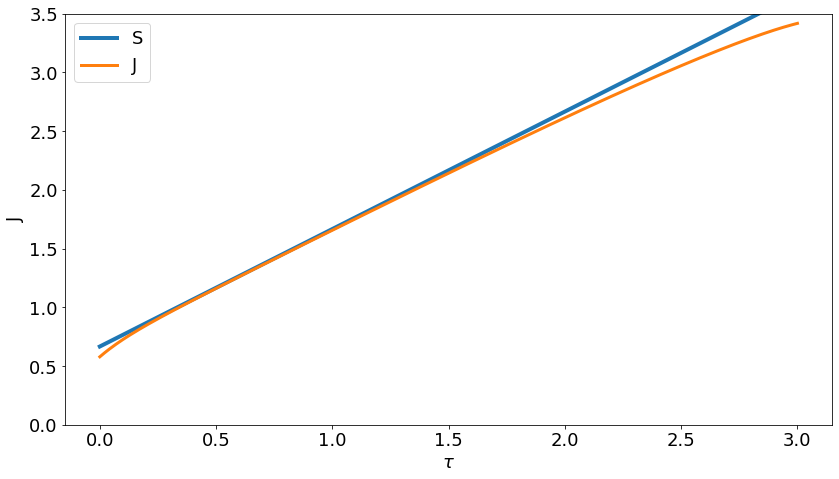

In [41]:
plt.figure(figsize=[12,7])
plt.plot(tau, S, label='S',linewidth = 4)
plt.plot(tau, J, label='J', linewidth = 3)
plt.ylim([0.0,3.5])
plt.xlabel("$\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_quadratic.jpg",bbox_inches='tight')

In [45]:
tau = np.linspace(0,3,301)
S = 0.666667 + tau
J = np.zeros(len(S))

for i in range(0,10):
    J = np.zeros(len(S))
    for m in range(0,3):
        I_in = formal_solution(tau,S, -mu[m])
        I_out = formal_solution(tau,S, mu[m])
    
        J+= 0.5 * (I_in + I_out) * wmu[m]
    
    S = J

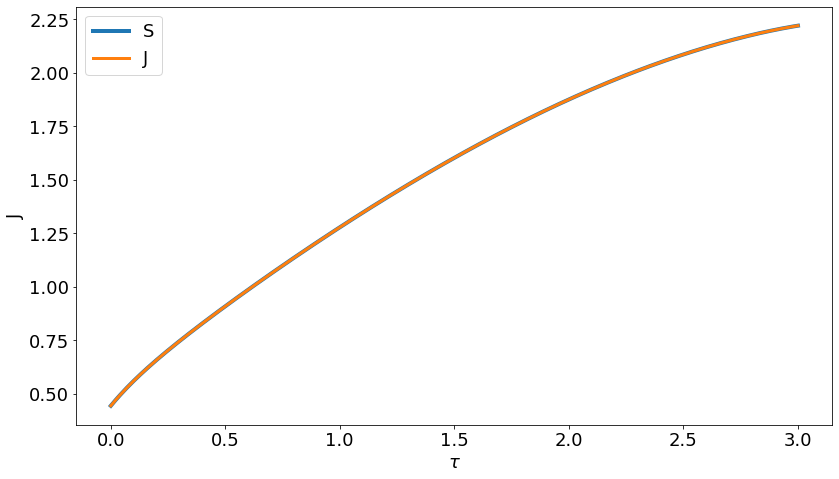

In [46]:
plt.figure(figsize=[12,7])
plt.plot(tau, S, label='S',linewidth = 4)
plt.plot(tau, J, label='J', linewidth = 3)
plt.xlabel("$\\tau$")
plt.ylabel("J")
plt.legend()
plt.tight_layout()
plt.savefig("J_quadratic.jpg",bbox_inches='tight')